# A/B Testing Hypothesis tests

## Scenario

You are a data scientist working for a web-based company and you are planning to roll out a new site design soon. For random samples of users one of two competing designs were presented and the ultimate purchase total was recorded (if any).

Your task is to determine which of the two designs yields higher total purchases, and if the result is statistically significant.

In [60]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [61]:
# Generate some data and randomize

# Some people bought nothing, the others bought 
# with some distribution
data1 = [0] * 50
data1.extend(stats.norm(12, 4).rvs(150))
np.random.shuffle(data1)

# The second design hooked less people, 
# but those that were hooked bought more stuff
data2 = [0] * 100
data2.extend(stats.norm(20, 5).rvs(100))
np.random.shuffle(data2)

# Make a data frame
df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head()

,A,B
0,8.945900,0.000000
1,10.597081,27.034220
2,9.590041,16.418384
3,0.000000,0.000000
4,0.000000,0.000000


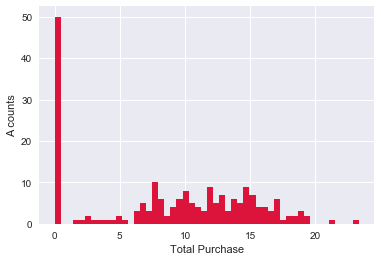

In [62]:
# Let's plot the data first
plt.hist(df["A"], bins=50, label="A", color=['crimson'])
plt.ylabel("A counts")
plt.xlabel("Total Purchase")

# Exercise: Make the same plot for dataset "B"


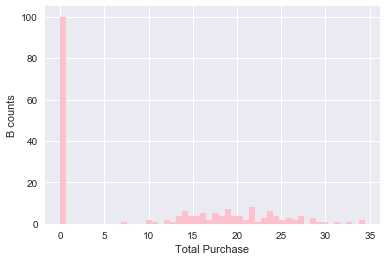

In [63]:
# Exercise: Make the same plot for dataset "B"
plt.hist(df["B"], bins=50, label="B", color=['pink'])
plt.ylabel("B counts")
plt.xlabel("Total Purchase")



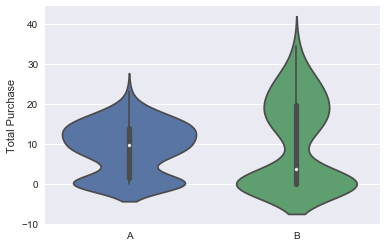

In [64]:
# Seaborn is also useful

sns.violinplot(data=df)
plt.ylabel("Total Purchase")
sns.plt.show()

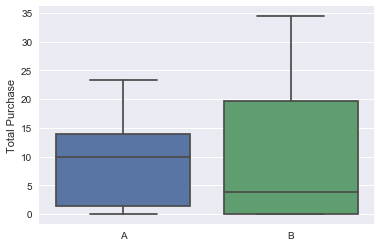

In [65]:
sns.boxplot(data=df)
plt.ylabel("Total Purchase")
sns.plt.show()

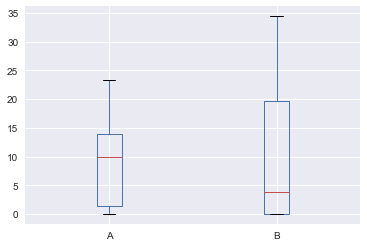

In [66]:
df.plot(kind = 'box')

## Exercises

* In the next cell, use pandas to make box plots from the data frame. Feel free to Google around if you can't remember how to do this.

Do you like the boxplots or violin plots better?

* Are our datasets normal, or approximately so? Use what we learned in the previous lesson to decide. Hint: You need to compute a statistical value for each of the two data sets.

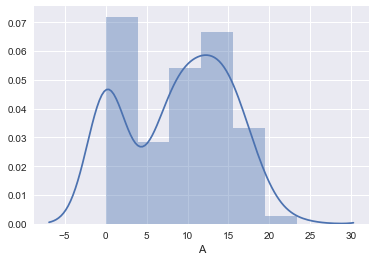

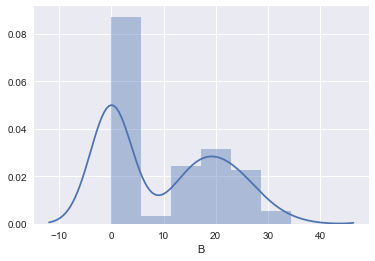

In [67]:
# Work out the exercises here
import seaborn as sns
sns.distplot(df["A"])
sns.plt.show()
sns.distplot(df["B"])
sns.plt.show()

# Statistical Tests

There are a few good statistical tests for A/B testing:
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)
* [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test)
* [Mann-Whitney test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

Each test makes various assumptions:
* ANOVA assumes normal distributions and equal variances in the two data sets
* The Welch t-test assumes normal distributions but not necessarily equal variances, and accounts for small sample sizes better
* The Mann-Whitney test assumes nothing about the distributions but requires at least 20 data points in each set, and produces a weaker p-value

Typically you need to choose the most appropriate test. Tests that make more assumptions are more discriminating (stronger p-values) but can be misleading on data sets that don't satisfy the assumptions.

Which test is most appropriate for our data?

In [68]:
# ANOVA assumes normal distributions and equal variances in the two data sets
df.describe()
# The Welch t-test assumes normal distributions but not necessarily equal variances, and accounts for small sample sizes better



,A,B
count,200.000000,200.000000
mean,8.816205,10.076001
std,6.277337,10.844998
min,0.000000,0.000000
25%,1.377399,0.000000
50%,9.830963,3.756722
75%,13.932656,19.640105
max,23.345423,34.429564


In [69]:
df.var()

A     39.404963
B    117.613976
dtype: float64

In [70]:
# The Mann-Whitney test assumes nothing about the 
# distributions but requires at least 20 data points in each set,
# and produces a weaker p-value
df.shape



(200, 2)

All of these tests are available in the `scipy` library, a stats library for python:
* [ANOVA](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.f_oneway.html)
* [Welch's t-test](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Mann-Whitney](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.mannwhitneyu.html)

In [71]:
# For example, to use ANOVA
# statistic : float The computed F-value of the test.
# pvalue : float The associated p-value from the F-distribution.
statistic, pvalue = stats.f_oneway(df["A"], df["B"])
print statistic
print pvalue

2.02152317716
0.15586664832


In statistics, one-way analysis of variance (abbreviated one-way ANOVA) is a technique used to compare means of three or more samples (using the F distribution). The ANOVA tests the null hypothesis (default position that there is no relationship) that samples in two or more groups are drawn from populations with the same mean values. Typically, however, the one-way ANOVA is used to test for differences among at least three groups, since the two-group case can be covered by a t-test. When there are only two means to compare, the t-test and the F-test are equivalent.

Note:  One-Way ANOVA: An ANOVA hypothesis tests the difference in population means based on one characteristic or factor.

Two-Way ANOVA: An ANOVA hypothesis tests comparisons between populations based on multiple characteristics.


In [72]:
# Use the Mann-Whitney test on our data
# look up the function in scipy from the link above
#  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
# statistic : float The Mann-Whitney U statistic, equal to min(U for x, U for y) if alternative is equal to None (deprecated; exists for backward compatibility), and U for y otherwise.
# pvalue : float p-value assuming an asymptotic normal distribution. One-sided or two-sided, depending on the choice of alternative.
    
u, p=stats.mannwhitneyu(df["A"], df["B"])
print u
print p

19219.0
0.243958575414


The Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.
Unlike the t-test it does not require the assumption of normal distributions. It is nearly as efficient as the t-test on normal distributions

In [73]:
Q1 = df.A.quantile(0.25)
Q3 = df.A.quantile(0.75)

IQR = Q3 - Q1

IQR

12.555256438614846

In [74]:
# df.drop(df[df.A < Q1 + 1.5 * IQR].index, inplace = True)

df.drop(df[df.A <= 0.0].index, inplace = True)

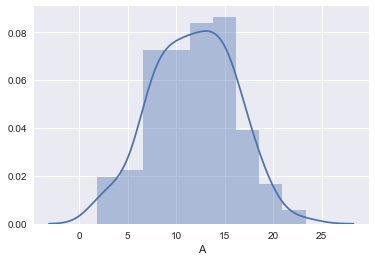

In [75]:
sns.distplot(df["A"])
sns.plt.show()

# Interpret your results
* Is there a significant difference in the mean total purchases in the two designs?
* Which design do you recommend and why? Write two sentences explaining your results and your recommendation.

Your explanation here.

# Final Exercise

Your results may or may not have been significant depending on the randomness of the data set. Try running the notebook a few more times to see if anything changes. You can do this in one step by using the Kernal menu and selecting "Restart & Run All".

If you can't get the opposite outcome, try altering the distributions of the data sets (change the variance in the second argument) until you get the other outcome.